In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%reload_ext autoreload
%autoreload 2

In [2]:
def make_layer(width: int, depth: int):
    layers = [width] * depth
    return layers

In [3]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target.astype(int)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh  = encoder.transform(y_test.reshape(-1, 1))


In [ ]:
depth = [1,2,3,4]
width = [2, 4, 8, 16, 32, 64, 128]
lr = [0.001, 0.01, 0.1]
lamb = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
reg_term = ["L1", "L2"]
information_L1 = {
    'depth' : [],
    'width' : [],
    'lr' : [],
    'lamb' : [],
    'acc' : []
}
information_L2 = {
    'depth' : [],
    'width' : [],
    'lr' : [],
    'lamb' : [],
    'acc' : []
}

Model = 1
for rt in reg_term:
    for l in lamb:
        for d in depth:
            for w in width:
                for r in lr:
                    Reg_nn = NeuralNetwork(X_train.shape[1], make_layer(width=width, depth=depth) + [10], [sigmoid]*depth + [softmax], [derivate(sigmoid)] + [derivate(softmax)], cross_entropy, cross_entropy_der)
                    Reg_nn.train_SGD(X_train, y_train_oh, epochs=100, batch_size=1000, learning_rate=r, optimizer="Adam")
                    y_pred = Reg_nn._feed_forward(X_test)
                    y_pred_label = np.argmax(y_pred, axis=1)
                    accuracy = np.mean(y_test == y_pred_label)
                    if rt == 'L1':
                        information_L1['depth'].append(d)
                        information_L1['width'].append(w)
                        information_L1['lr'].append(r)
                        information_L1['lamb'].append(l)
                        information_L1['acc'].append(accuracy)
                    if rt == 'L1':
                        information_L1['depth'].append(d)
                        information_L1['width'].append(w)
                        information_L1['lr'].append(r)
                        information_L1['lamb'].append(l)
                        information_L1['acc'].append(accuracy)    

                    print(f"Model {Model} done. Test accuracy: {accuracy:.4f}")
                    Model += 1


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
def make_layer(width: int, depth: int):
    layers = [width] * depth
    return layers

            




[5, 5, 5, 5, 5]


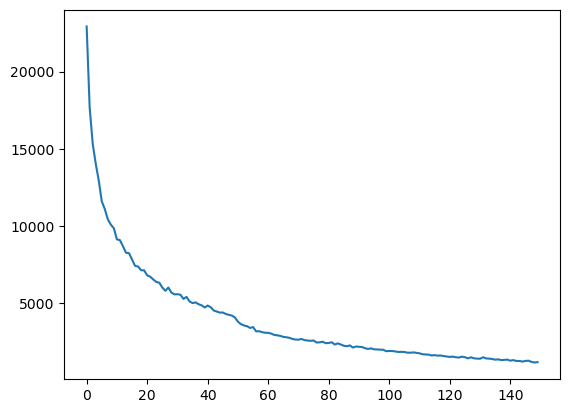

In [5]:
Reg_nn = NeuralNetwork(X_train.shape[1], [32,32,10], [sigmoid, sigmoid,softmax], [derivate(sigmoid), derivate(sigmoid), derivate(softmax)], cross_entropy, cross_entropy_der)
Reg_nn.train_SGD(X_train, y_train_oh, epochs=100, batch_size=1000, learning_rate=0.01, optimizer="Adam")
y_pred = Reg_nn._feed_forward(X_test)
y_pred_label = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_test == y_pred_label)
print(accuracy)

0.9449285714285715
